# 1. Read and visualise the data

#### Import all the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#### Import dataset

In [3]:
# read the dataset
ctry_df = pd.read_csv("C:/Users/Hitesh/Desktop/Assignments/Machine Learning/Module 6/Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
ctry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Perform some basic data checks

In [4]:
# basics of the df
ctry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# missing values
round(100*(ctry_df.isnull().sum())/len(ctry_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [6]:
ctry_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# 2. Clean the data

#### Check if we have Duplicate Rows for any Country

In [7]:
df_ctry_duplicates = ctry_df[ctry_df.duplicated(['country'])]

In [8]:
df_ctry_duplicates

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


#### Change the percentage value of exports,health and imports to actual values from GDP per capita

In [9]:
ctry_df['exports']=ctry_df['gdpp']*(ctry_df['exports']/100)

In [10]:
ctry_df['health']=ctry_df['gdpp']*(ctry_df['health']/100)

In [11]:
ctry_df['imports']=ctry_df['gdpp']*(ctry_df['imports']/100)

In [12]:
ctry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Check for Distribution of Data

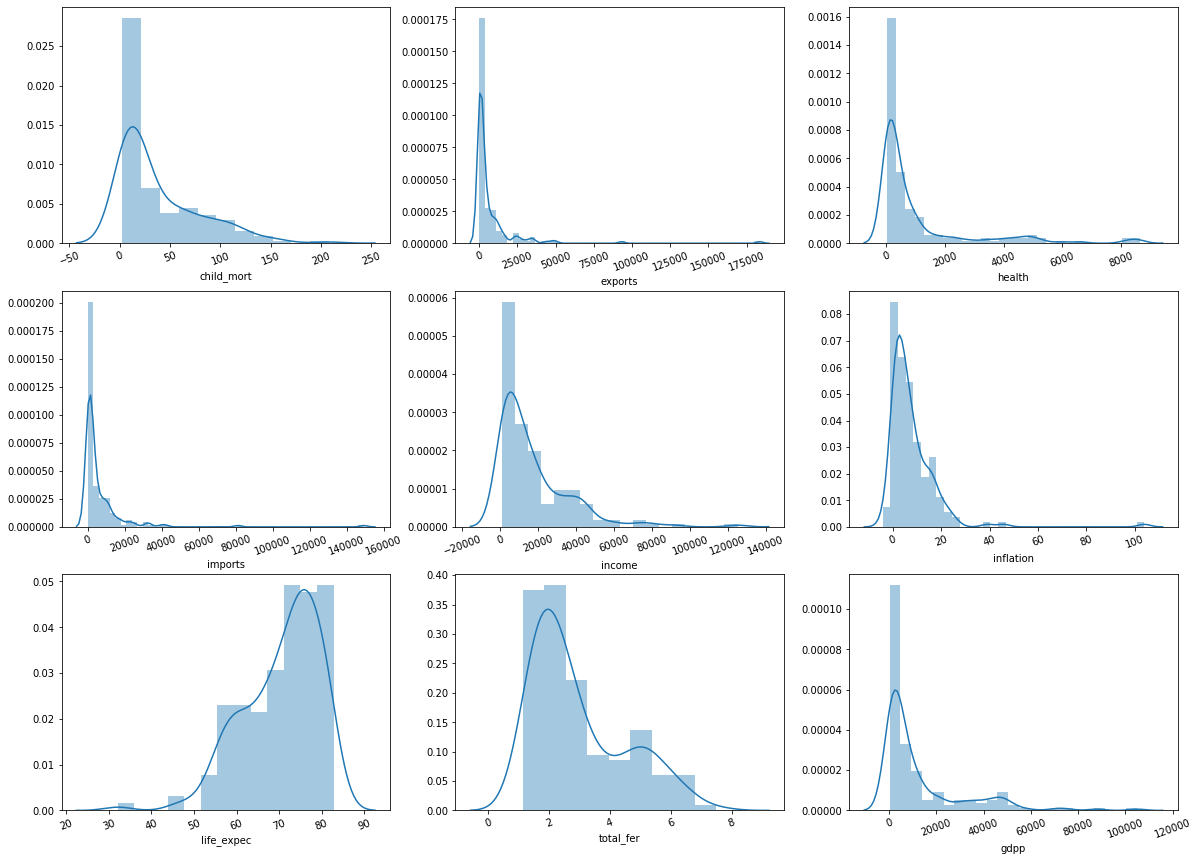

In [13]:
plt.figure(figsize=(20,20))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(4, 3, i[0]+1)
    sns.distplot(ctry_df[i[1]])
    plt.xticks(rotation = 20)

#### Single Variate Analysis

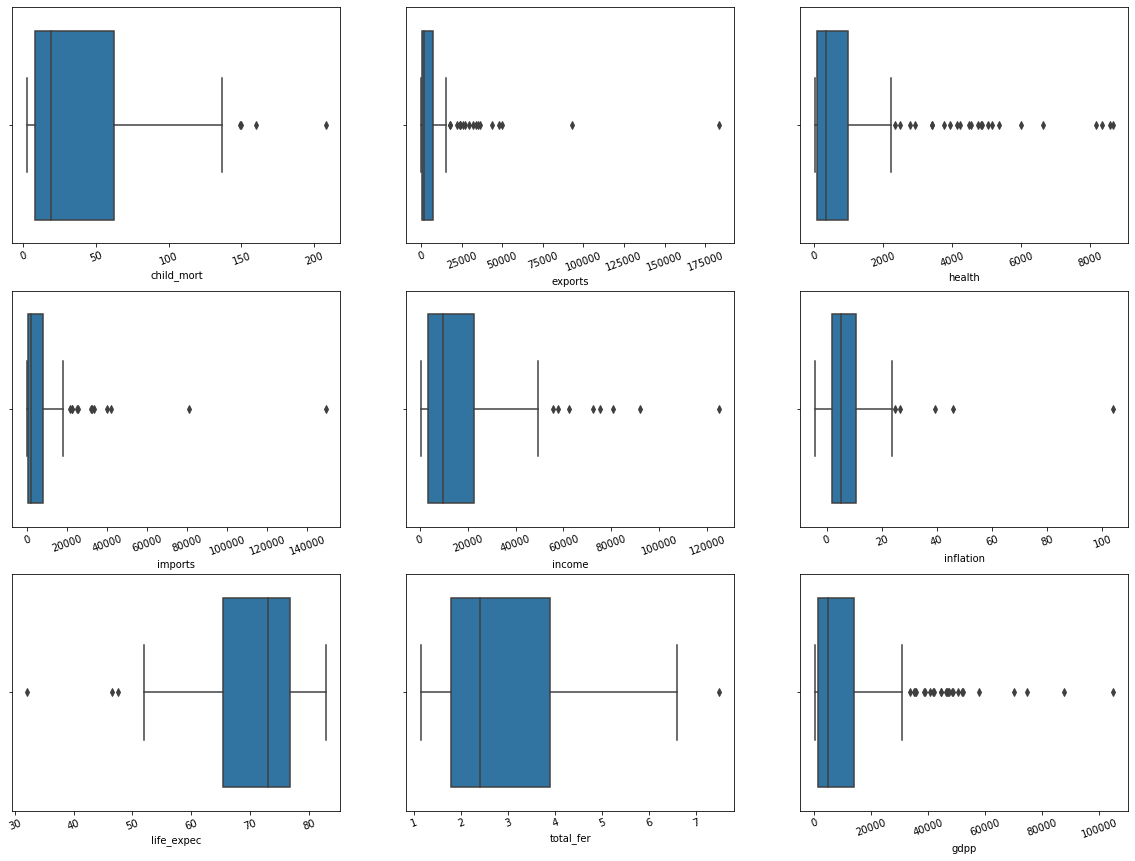

In [14]:
plt.figure(figsize=(20,20))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(4, 3, i[0]+1)
    sns.boxplot(ctry_df[i[1]])
    plt.xticks(rotation = 20)

### Outlier Alalysis

Lets not remove any of the Outlier as each row represnts one country. We do not want to loose data of any country.

Capping is good option where data can be capped on 1 percentile to handle low data points and 99 percentile to handle high datapoints.

In [15]:
Q1_child_mort = ctry_df['child_mort'].quantile(0.01)
Q4_child_mort = ctry_df['child_mort'].quantile(0.99)
ctry_df['child_mort'][ctry_df['child_mort'] <= Q1_child_mort]=Q1_child_mort
ctry_df['child_mort'][ctry_df['child_mort'] >= Q4_child_mort]=Q4_child_mort

Q1_exports = ctry_df['exports'].quantile(0.01)
Q4_exports = ctry_df['exports'].quantile(0.99)
ctry_df['exports'][ctry_df['exports'] <= Q1_exports]=Q1_exports
ctry_df['exports'][ctry_df['exports'] >= Q4_exports]=Q4_exports

Q1_health = ctry_df['health'].quantile(0.01)
Q4_health = ctry_df['health'].quantile(0.99)
ctry_df['health'][ctry_df['health'] <= Q1_health]=Q1_health
ctry_df['health'][ctry_df['health'] >= Q4_health]=Q4_health

Q1_imports = ctry_df['imports'].quantile(0.01)
Q4_imports = ctry_df['imports'].quantile(0.99)
ctry_df['imports'][ctry_df['imports'] <= Q1_imports]=Q1_imports
ctry_df['imports'][ctry_df['imports'] >= Q4_imports]=Q4_imports

Q1_income = ctry_df['income'].quantile(0.01)
Q4_income = ctry_df['income'].quantile(0.99)
ctry_df['income'][ctry_df['income'] <= Q1_income]=Q1_income
ctry_df['income'][ctry_df['income'] >= Q4_income]=Q4_income

Q1_inflation = ctry_df['inflation'].quantile(0.01)
Q4_inflation = ctry_df['inflation'].quantile(0.99)
ctry_df['inflation'][ctry_df['inflation'] <= Q1_inflation]=Q1_inflation
ctry_df['inflation'][ctry_df['inflation'] >= Q4_inflation]=Q4_inflation

Q1_life_expec = ctry_df['life_expec'].quantile(0.01)
Q4_life_expec = ctry_df['life_expec'].quantile(0.99)
ctry_df['life_expec'][ctry_df['life_expec'] <= Q1_life_expec]=Q1_life_expec
ctry_df['life_expec'][ctry_df['life_expec'] >= Q4_life_expec]=Q4_life_expec

Q1_total_fer = ctry_df['total_fer'].quantile(0.01)
Q4_total_fer = ctry_df['total_fer'].quantile(0.99)
ctry_df['total_fer'][ctry_df['total_fer'] <= Q1_total_fer]=Q1_total_fer
ctry_df['total_fer'][ctry_df['total_fer'] >= Q4_total_fer]=Q4_total_fer

Q1_gdpp = ctry_df['gdpp'].quantile(0.01)
Q4_gdpp = ctry_df['gdpp'].quantile(0.99)
ctry_df['gdpp'][ctry_df['gdpp'] <= Q1_gdpp]=Q1_gdpp
ctry_df['gdpp'][ctry_df['gdpp'] >= Q4_gdpp]=Q4_gdpp

ctry_df.shape

(167, 10)

Check data after removing Outliers

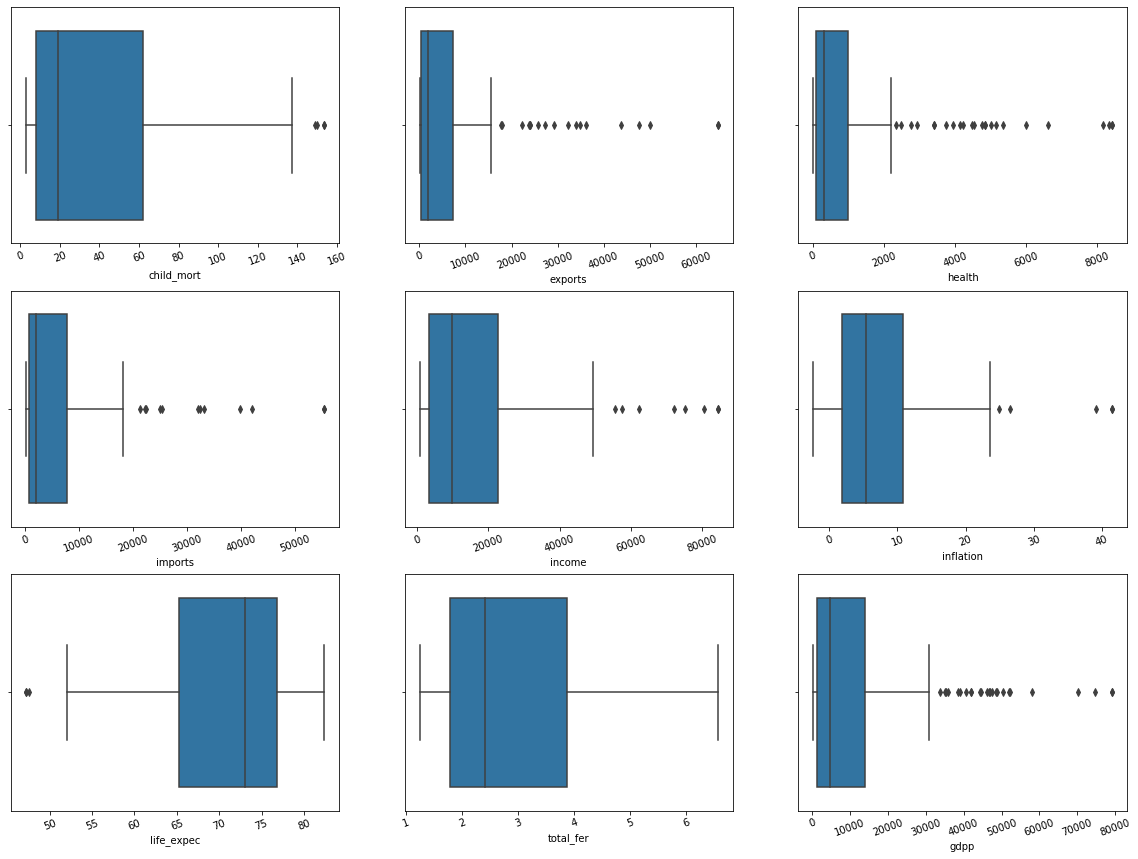

In [16]:
plt.figure(figsize=(20,20))
features = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(4, 3, i[0]+1)
    sns.boxplot(ctry_df[i[1]])
    plt.xticks(rotation = 20)

#### Multi-Variate Analysis

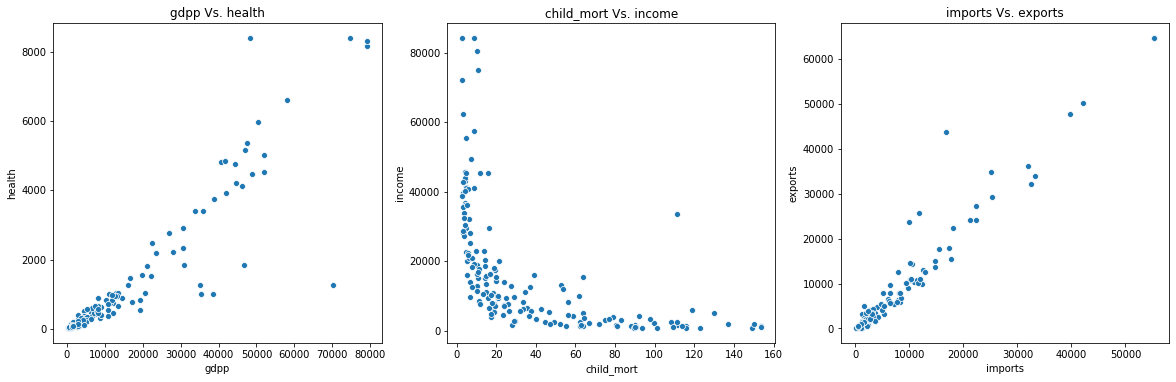

In [17]:
# Plot some of the basic scatterplots

plt.figure(figsize=(20,20))

plt.subplot(3, 3,1)
plt.title('gdpp Vs. health')
sns.scatterplot(x = 'gdpp', y = 'health',  legend = 'full', data = ctry_df, palette='Set1')

plt.subplot(3, 3, 2)
plt.title('child_mort Vs. income')
sns.scatterplot(x = 'child_mort', y = 'income', legend = 'full', data = ctry_df, palette='Set1')

plt.subplot(3, 3, 3)
plt.title('imports Vs. exports')
sns.scatterplot(x = 'imports', y = 'exports', legend = 'full', data = ctry_df, palette='Set1')

Check the correlation among variables

(9.0, 0.0)

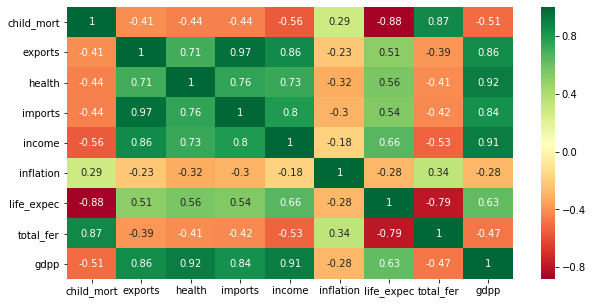

In [18]:
corr= ctry_df.loc[:, ctry_df.dtypes!=np.object].corr()

plt.figure(figsize=(10,5))
ax=sns.heatmap(corr,annot=True,cmap='RdYlGn')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 3. Prepare the data for modelling

In [19]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

#### Check for the hopkins score to see the clustering tendency

In [20]:
#Let's check the Hopkins measure
hopkins(ctry_df.drop('country', axis = 1))

0.9472952210317833

Sice the Hopkins Score is above 90, it tends to indicate the data is highly clustered.

Remove Country from DataFrame to use it for scaling later

In [21]:
df1=ctry_df.drop('country', axis = 1)

In [22]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


## Scaling the data

In [23]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df1 = standard_scaler.fit_transform(df1)

In [24]:
df1 = pd.DataFrame(df1)
df1.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


## K- means Clustering

### Silhouette Analysis

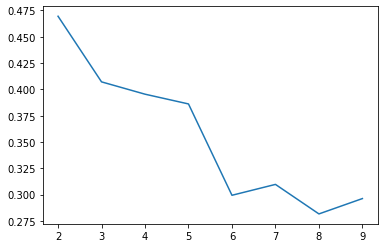

In [25]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

### Elbow Curve plot

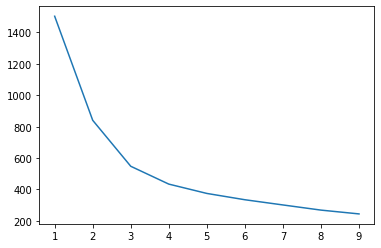

In [26]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

### KMeans with the K the we have chosen

Now from above we know that -

silhouette score for Cluster 2 is highest but it is always advisable to take atleast 3 clusters. silhouette score drops as the clustersize increases.
Elbow curve suggests 3 as Cluster sise as well.

In [27]:
#Let's perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [28]:
## Let's make a copy of our original data before using it for analysis
ctry_df_cpy = ctry_df.copy()

In [29]:
ctry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [30]:
# Let's add the cluster Ids to the original data 
df_km = pd.concat([ctry_df.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns = ['country','child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id']
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [31]:
# Cross-check for the Nullability of data
df_km.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [32]:
# Check the count of observation per cluster

df_km['cluster_id'].value_counts()

2    90
1    48
0    29
Name: cluster_id, dtype: int64

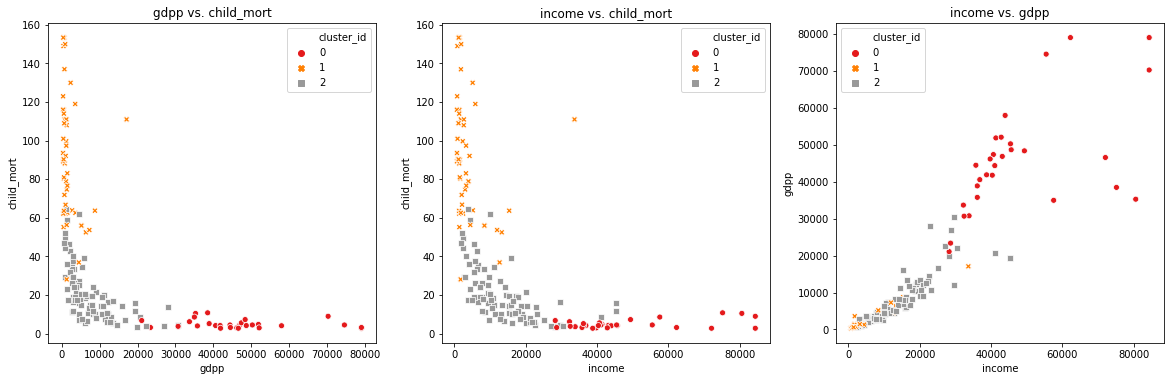

In [33]:
# Plot the Cluster with respect to the clusters obtained

plt.figure(figsize=(20,20))

plt.subplot(3, 3,1)
plt.title('gdpp vs. child_mort')
sns.scatterplot(x = 'gdpp', y ='child_mort',hue ='cluster_id',legend = 'full',data=df_km, palette='Set1',style='cluster_id')

plt.subplot(3, 3, 2)
plt.title('income vs. child_mort')
sns.scatterplot(x='income',y ='child_mort',hue='cluster_id',legend = 'full',data = df_km,palette='Set1',style='cluster_id')

plt.subplot(3, 3, 3)
plt.title('income vs. gdpp')
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full',data = df_km,palette='Set1',style='cluster_id')

## Cluster Profiling - K Means Clustering

In [34]:
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


Now segregate the important attributes like 'gdpp','child_mort','income' and do cluster analysis on these 3

In [35]:
sub_df_km=df_km[['country','gdpp','child_mort','income','cluster_id']]
sub_df_km.head()

,country,gdpp,child_mort,income,cluster_id
0,Afghanistan,553.0,90.2,1610.0,1
1,Albania,4090.0,16.6,9930.0,2
2,Algeria,4460.0,27.3,12900.0,2
3,Angola,3530.0,119.0,5900.0,1
4,Antigua and Barbuda,12200.0,10.3,19100.0,2


Take the means off the attribures based on their cluster_id

In [36]:
sub_df_km.drop('country', axis = 1).groupby('cluster_id').mean()

,gdpp,child_mort,income
cluster_id,,,
0,46068.137931,4.989655,47784.413793
1,1911.400833,90.335417,3901.010000
2,7808.577778,20.547778,13804.333333


Plot the means of attributes 'gdpp','child_mort','income' by grouping them on cluster_id

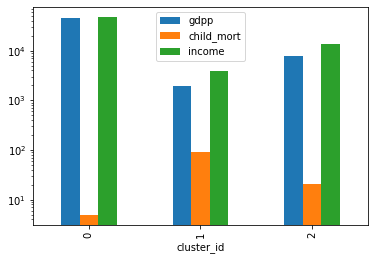

In [37]:
sub_df_km.drop('country', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar',logy=True)

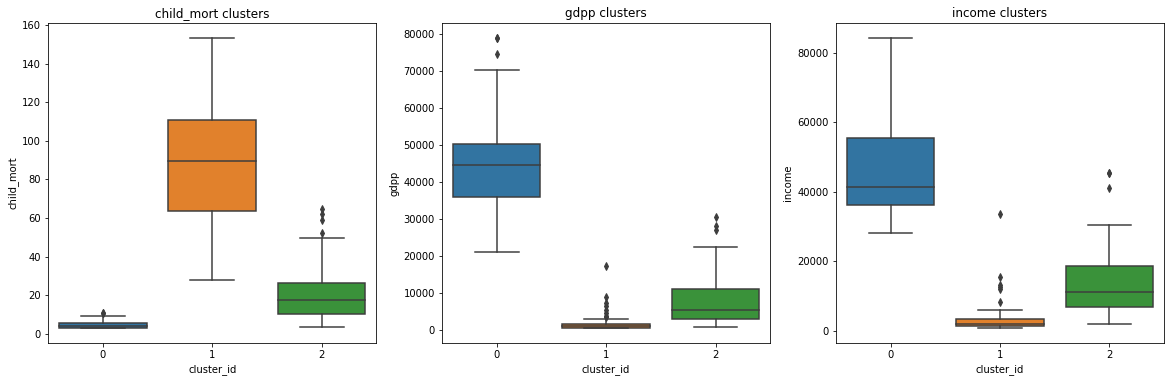

In [38]:
plt.figure(figsize=(20,20))

plt.subplot(3, 3,1)
plt.title('child_mort clusters')
sns.boxplot(x='cluster_id', y='child_mort', data=sub_df_km)

plt.subplot(3, 3, 2)
plt.title('gdpp clusters')
sns.boxplot(x='cluster_id', y='gdpp', data=sub_df_km)

plt.subplot(3, 3, 3)
plt.title('income clusters')
sns.boxplot(x='cluster_id', y='income', data=sub_df_km)

### Finding the observations that belong to Cluster-1 (Lowest GDP and Income but Highest Child_Morality)

In [39]:
#Let's use the concept of binning
df_km[df_km['cluster_id']==1]['country'].head()

0      Afghanistan
3           Angola
17           Benin
21        Botswana
25    Burkina Faso
Name: country, dtype: object

### 10 Developed Countries based on 'gdpp','child_mort','income'

In [40]:
df_km[df_km['cluster_id']==0].sort_values(by=['gdpp','child_mort','income'], ascending=[False, True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.6200,81.3,1.63,79088.0,0
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.9500,81.0,1.95,79088.0,0
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.3170,82.2,1.52,74600.0,0
123,Qatar,9.0,43796.90,1272.4300,16731.40,84374.0,6.9800,79.5,2.07,70300.0,0
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.2200,79.5,1.87,58000.0,0
144,Sweden,3.0,24070.20,5017.2300,21204.70,42900.0,0.9910,81.5,1.98,52100.0,0
7,Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.1600,82.0,1.93,51900.0,0
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.8480,80.7,1.79,50300.0,0
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-2.3488,80.4,2.05,48700.0,0
159,United States,7.3,6001.60,8410.3304,7647.20,49400.0,1.2200,78.7,1.93,48400.0,0


### K-Means Top -10 Under Developed Countries based on Lowest GDP and Income but Highest Child_Morality

In [41]:
df_km[df_km['cluster_id']==1].sort_values(by=['gdpp','child_mort','income'], ascending=[True, False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,1
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,1
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,1
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,1
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,1
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,1
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,1
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.01,47.5,5.2100,446.00,1
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,1
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.60,61.7,4.6100,482.00,1


## Hierarchical Clustering

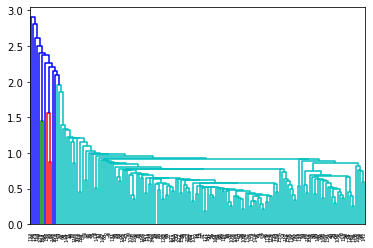

In [42]:
# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

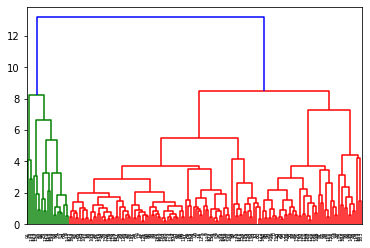

In [43]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Now we can see that we can cut the Cluster on Cluster Size 4

In [44]:
# 4 clusters
h_cluster_labels_chk = cut_tree(mergings, n_clusters=4).reshape(-1, )
h_cluster_labels_chk

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [45]:
df_hier = pd.concat([ctry_df.reset_index().drop('index', axis = 1), pd.Series(h_cluster_labels_chk)], axis = 1)
df_hier.columns = ['country','child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id']
df_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


Below you can see that Cluster 3 is very small Cluster and we can rellay avoid this cluster by getting it merged in some bigger cluster.

In [46]:
df_hier['cluster_id'].value_counts()

1    96
0    50
2    18
3     3
Name: cluster_id, dtype: int64

To avoid smaller cluster, lets consider 3 Clusters 

In [47]:
# 3 clusters
h_cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
h_cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [48]:
df_hier = pd.concat([ctry_df.reset_index().drop('index', axis = 1), pd.Series(h_cluster_labels)], axis = 1)
df_hier.columns = ['country','child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id']
df_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


Now if you see below, Cluster looks better balanced

In [49]:
df_hier['cluster_id'].value_counts()

1    96
0    50
2    21
Name: cluster_id, dtype: int64

In [50]:
# Cross-check the NULLs
df_hier.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

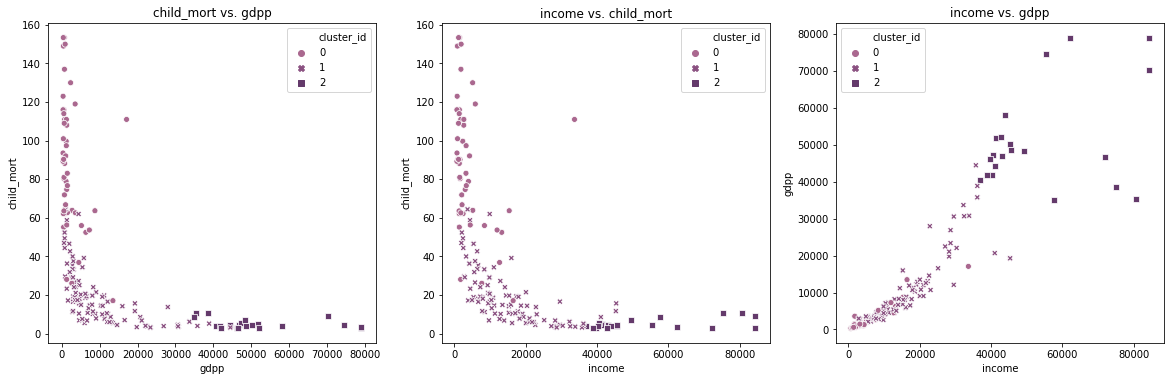

In [51]:
# Plot the Cluster with respect to the clusters obtained

plt.figure(figsize=(20,20))
cmap = sns.cubehelix_palette(dark=.3, light=.5, as_cmap=True)

plt.subplot(3, 3,1)
plt.title('child_mort vs. gdpp')
sns.scatterplot(x = 'gdpp', y ='child_mort',hue ='cluster_id', data = df_hier, palette=cmap,style='cluster_id')

plt.subplot(3, 3, 2)
plt.title('income vs. child_mort')
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', data = df_hier, palette=cmap,style='cluster_id')

plt.subplot(3, 3, 3)
plt.title('income vs. gdpp')
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', data = df_hier, palette=cmap,style='cluster_id')

## Cluster Profiling - Hierarchical Clustering

In [52]:
df_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


Now segregate the important attributes like 'gdpp','child_mort','income' and do cluster analysis on these 3

In [53]:
sub_df_hier=df_hier[['country','gdpp','child_mort','income','cluster_id']]
sub_df_hier.head()

,country,gdpp,child_mort,income,cluster_id
0,Afghanistan,553.0,90.2,1610.0,0
1,Albania,4090.0,16.6,9930.0,1
2,Algeria,4460.0,27.3,12900.0,1
3,Angola,3530.0,119.0,5900.0,0
4,Antigua and Barbuda,12200.0,10.3,19100.0,1


Take the means off the attribures based on their cluster_id

In [54]:
sub_df_hier.drop('country', axis = 1).groupby('cluster_id').mean()

,gdpp,child_mort,income
cluster_id,,,
0,2157.944800,87.586000,4229.169600
1,9849.187500,19.188542,15438.333333
2,51289.333333,5.176190,53421.333333


Plot the means of attributes 'gdpp','child_mort','income' by grouping them on cluster_id

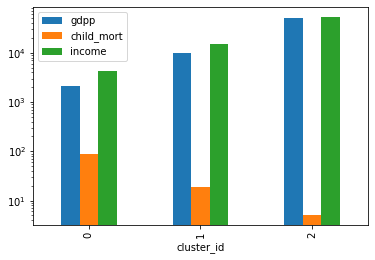

In [55]:
sub_df_hier.drop('country', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar',logy=True)

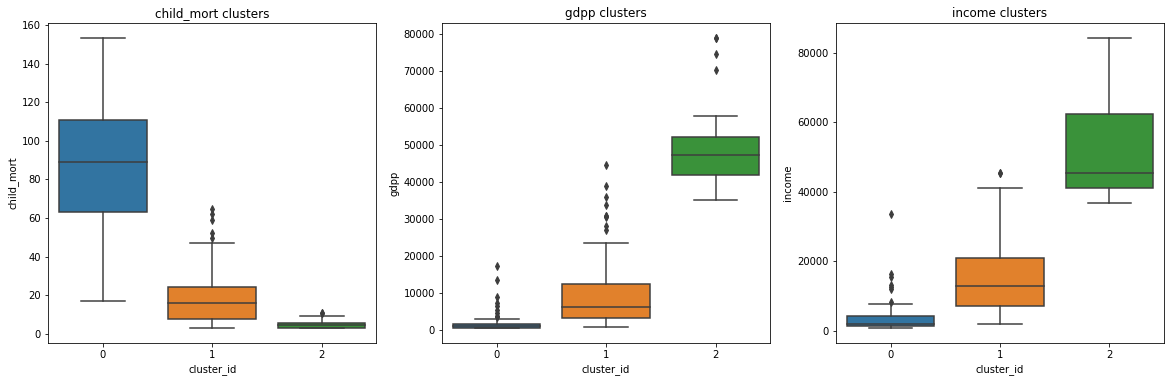

In [56]:
plt.figure(figsize=(20,20))

plt.subplot(3, 3,1)
plt.title('child_mort clusters')
sns.boxplot(x='cluster_id', y='child_mort', data=sub_df_hier)

plt.subplot(3, 3, 2)
plt.title('gdpp clusters')
sns.boxplot(x='cluster_id', y='gdpp', data=sub_df_hier)

plt.subplot(3, 3, 3)
plt.title('income clusters')
sns.boxplot(x='cluster_id', y='income', data=sub_df_hier)

### Finding the observations that belong to Cluster-0 (Lowest GDP and Income but Highest Child_Morality)

In [57]:
#Let's use the concept of binning
df_hier[df_hier['cluster_id']==0]['country'].head()

0      Afghanistan
3           Angola
17           Benin
21        Botswana
25    Burkina Faso
Name: country, dtype: object

### Top 10 Developed Countries based on 'gdpp','child_mort','income'

In [58]:
df_hier[df_hier['cluster_id']==2].sort_values(by=['gdpp','child_mort','income'], ascending=[False, True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.6200,81.3,1.63,79088.0,2
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.9500,81.0,1.95,79088.0,2
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.3170,82.2,1.52,74600.0,2
123,Qatar,9.0,43796.90,1272.4300,16731.40,84374.0,6.9800,79.5,2.07,70300.0,2
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.2200,79.5,1.87,58000.0,2
144,Sweden,3.0,24070.20,5017.2300,21204.70,42900.0,0.9910,81.5,1.98,52100.0,2
7,Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.1600,82.0,1.93,51900.0,2
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.8480,80.7,1.79,50300.0,2
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-2.3488,80.4,2.05,48700.0,2
159,United States,7.3,6001.60,8410.3304,7647.20,49400.0,1.2200,78.7,1.93,48400.0,2


### Hier- Clustering -  Top -10 Under Developed Countries based on Lowest GDP and Income but Highest Child_Morality

In [59]:
df_hier[df_hier['cluster_id']==0].sort_values(by=['gdpp','child_mort','income'], ascending=[True, False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,0
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,0
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,0
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,0
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,0
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,0
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.01,47.5,5.2100,446.00,0
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,0
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.60,61.7,4.6100,482.00,0
